# # POPULATION

In [1]:
!pip3 install -U git+https://github.com/lorens247/pyFTS

  Cloning https://github.com/lorens247/pyFTS to /tmp/pip-req-build-5h_uxa0e
  Running command git clone -q https://github.com/lorens247/pyFTS /tmp/pip-req-build-5h_uxa0e


In [14]:
# Common imports

import warnings
warnings.filterwarnings('ignore')
import numpy as np # numerical processing library
import matplotlib.pyplot as plt # data visualization
import pandas as pd # data analysis
import skfuzzy as fuzz #fuzzy library
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import pandas as pd

pd.options.display.max_rows = 10
df = pd.read_csv('Population.csv')

print(df)

   Year  Population
0  2006     3233366
1  2007     3321854
2  2008     3412667
3  2009     3506165
4  2010     3602121
5  2011     3700219
6  2012     3799996
7  2013     3898048
8  2014     4012946
9  2015     4122820


In [16]:
# Triangular Membership Function

def triangular(x, a, b, c):
    return max( min( (x-a)/(b-a), (c-x)/(c-b) ), 0 )

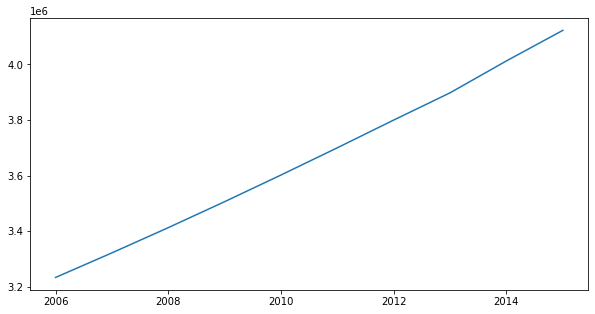

In [17]:
# Read Population data with Year and Population

df = pd.read_csv('Population.csv')
plt.subplots(nrows=1, ncols=1, figsize=[10,5])

plot(df['Year'],df['Population'])

In [27]:
# Create universe of discourse in Python using linspace ()

df = pd.read_csv('Population.csv')
X = np.linspace(start=0, stop=4122820, num=6, endpoint=True, retstep=False)
print(X)

AttributeError: module 'numpy' has no attribute 'max'

In [ ]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [ ]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

In [ ]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

In [ ]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

In [ ]:
fuzzyfied = fs.fuzzyfy(4122820, method='maximum', mode='sets')

print(fuzzyfied)

In [ ]:
model.predict([4122820])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])